### Imports necesarios y carga de datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
import scipy.stats as scp
from sklearn import preprocessing

# APARTADO B

In [2]:
b_cancer = datasets.load_breast_cancer()

In [3]:
b_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
b_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Correct classification Logistic  0.5 % of the data:  0.8842105263157894
Correct classification SVM       0.5 % of the data:  0.856140350877193
Correct classification Logistic  0.7 % of the data:  0.8888888888888888
Correct classification SVM       0.7 % of the data:  0.847953216374269
Correct classification Logistic  0.8 % of the data:  0.9035087719298246
Correct classification SVM       0.8 % of the data:  0.8771929824561403


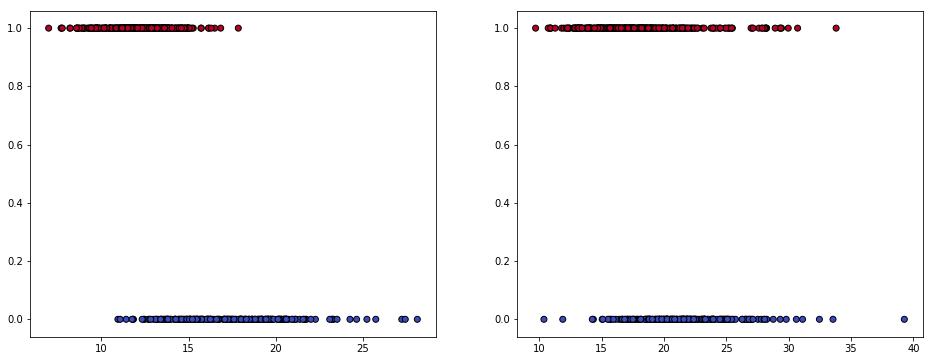

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

X = b_cancer.data[:, :2]
y = b_cancer.target

n_classes = 2

fig, sub = plt.subplots(1, 2, figsize=(16,6))
sub[0].scatter(X[:,0], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
sub[1].scatter(X[:,1], y, c=y, cmap=plt.cm.coolwarm, edgecolors='k')

particions = [0.5, 0.7, 0.8]

for part in particions:
    x_t, x_v, y_t, y_v = train_test_split(X, y, train_size=part)
    
    #Creem el regresor logístic
    logireg = LogisticRegression(C=2.0, fit_intercept=True, penalty='l2', tol=0.001, solver='lbfgs')

    # l'entrenem
    logireg.fit(x_t, y_t)

    print ("Correct classification Logistic ", part, "% of the data: ", logireg.score(x_v, y_v))
    
    #Creem el regresor logístic
    svc = svm.SVC(C=10.0, kernel='rbf', gamma=0.9, probability=True)

    # l'entrenem 
    svc.fit(x_t, y_t)
    probs = svc.predict_proba(x_v)
    print ("Correct classification SVM      ", part, "% of the data: ", svc.score(x_v, y_v))


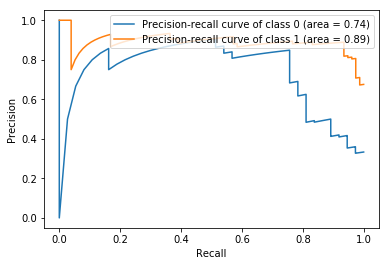

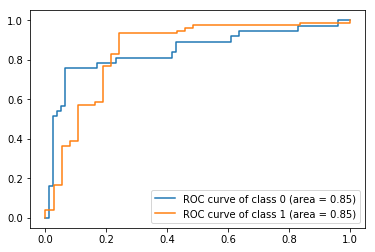

In [6]:
from sklearn.metrics import f1_score, precision_recall_curve, average_precision_score, roc_curve, auc

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}
plt.figure()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_v == i, probs[:, i])
    average_precision[i] = average_precision_score(y_v == i, probs[:, i])

    plt.plot(recall[i], precision[i],
    label='Precision-recall curve of class {0} (area = {1:0.2f})'
                           ''.format(i, average_precision[i]))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc="upper right")

    
# Compute ROC curve and ROC area for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_v == i, probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# Plot ROC curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))
plt.legend()

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def show_C_effect(C=1.0, gamma=0.7, degree=3):

    # import some data to play with
    b_cancer = datasets.load_breast_cancer()
    # Take the first two features. We could avoid this by using a two-dim dataset
    X = b_cancer.data[:, :2]
    y = b_cancer.target

    # we create an instance of SVM and fit out data. We do not scale our
    # data since we want to plot the support vectors
    # title for the plots
    titles = ('SVC with linear kernel',
              'LinearSVC (linear kernel)',
              'SVC with RBF kernel',
              'SVC with polynomial (degree 3) kernel')

    #C = 1.0  # SVM regularization parameter
    models = (svm.SVC(kernel='linear', C=C),
              svm.LinearSVC(C=C, max_iter=1000000),
              svm.SVC(kernel='rbf', gamma=gamma, C=C),
              svm.SVC(kernel='poly', degree=degree, gamma='auto', C=C))
    models = (clf.fit(X, y) for clf in models)

    plt.close('all')
    fig, sub = plt.subplots(2, 2, figsize=(14,9))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)

    for clf, title, ax in zip(models, titles, sub.flatten()):
        plot_contours(ax, clf, xx, yy,
                      cmap=plt.cm.coolwarm, alpha=0.8)
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('mean radius')
        ax.set_ylabel('mean texture')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

    plt.show()


### Juego de pruebas con diferentes valores de la variable slack

#### C = 0.1

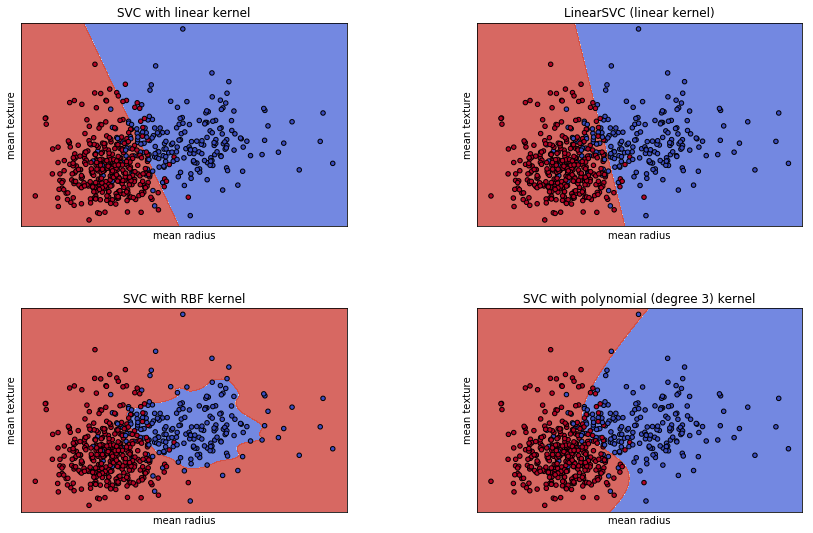

In [8]:
show_C_effect(C=0.1)

#### C = 5

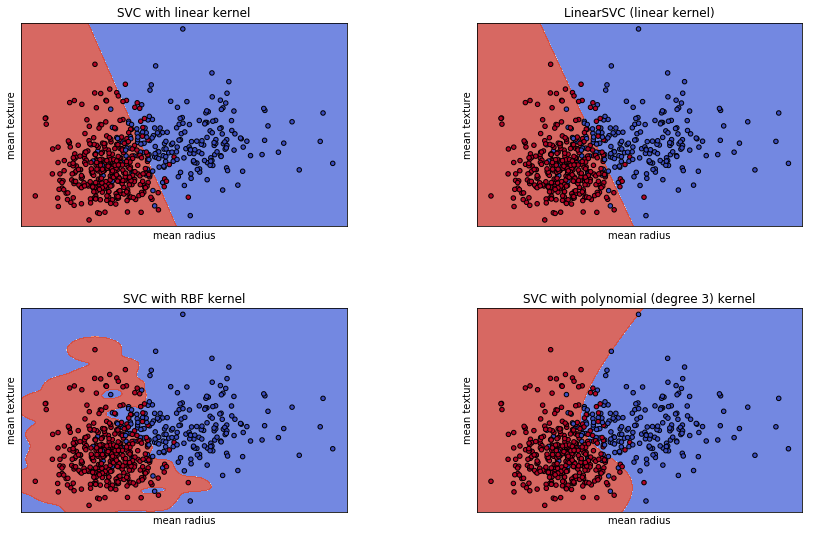

In [9]:
show_C_effect(C=5)

#### C = 0.9

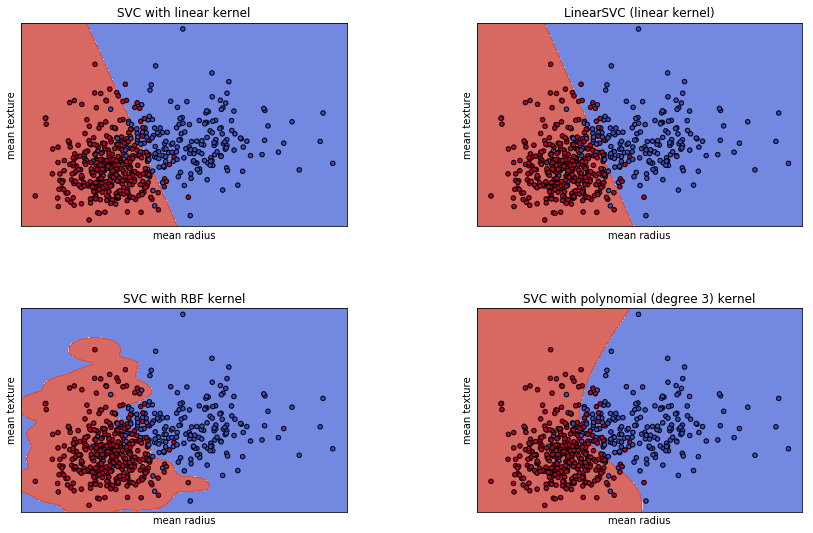

In [10]:
show_C_effect(C=0.9)

### Regresión Logística

In [11]:
y_test_pred = logireg.predict(x_v)
y_train_pred = logireg.predict(x_t)

lr_acc=accuracy_score(y_test_pred,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_v))

Train Set Accuracy:88.79120879120879
Test Set Accuracy:90.35087719298247

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.93      0.84        30
           1       0.97      0.89      0.93        84

   micro avg       0.90      0.90      0.90       114
   macro avg       0.87      0.91      0.88       114
weighted avg       0.92      0.90      0.91       114



### SVC

In [12]:
y_test_pred2 = svc.predict(x_v)
y_train_pred2=svc.predict(x_t)

svc_acc=accuracy_score(y_test_pred2,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred2,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred2,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred2,y_v))

Train Set Accuracy:94.94505494505493
Test Set Accuracy:87.71929824561403

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80        33
           1       0.94      0.89      0.91        81

   micro avg       0.88      0.88      0.88       114
   macro avg       0.85      0.87      0.86       114
weighted avg       0.88      0.88      0.88       114



### KNN

In [13]:
knn=KNeighborsClassifier(n_neighbors=8)

knn.fit(x_t,y_t)

y_test_pred3 = knn.predict(x_v)
y_train_pred3 = knn.predict(x_t)

knn_acc=accuracy_score(y_test_pred3,y_v)

print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_t)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_v)*100))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_v))

Train Set Accuracy:90.76923076923077
Test Set Accuracy:88.59649122807018

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        34
           1       0.94      0.90      0.92        80

   micro avg       0.89      0.89      0.89       114
   macro avg       0.86      0.88      0.87       114
weighted avg       0.89      0.89      0.89       114



### Comparacion entre modelos

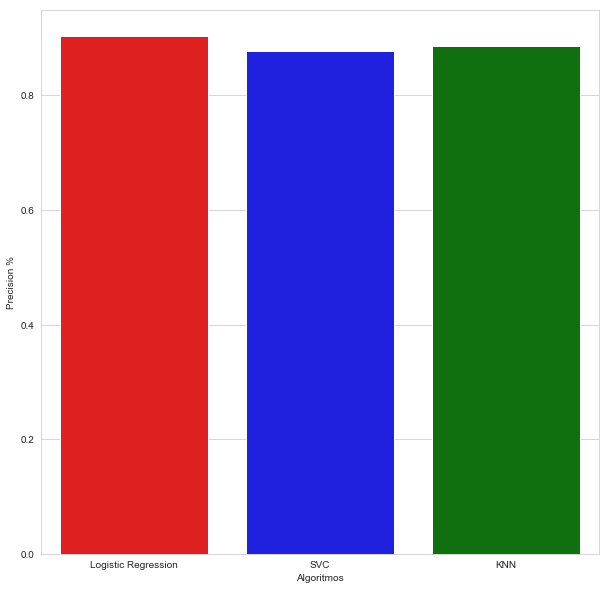

In [14]:
colors = ["red","blue","green"]

sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
plt.ylabel("Precision %")
plt.xlabel("Algoritmos")
sns.barplot(x=['Logistic Regression', 'SVC','KNN'],y=[lr_acc,svc_acc,knn_acc], palette=colors )
plt.show()

# APARTADO A

In [15]:
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

dataset = load_dataset('../Data/ApartadoA/weatherAUS.csv')

## 1. EDA

In [16]:
dataset.shape

(145460, 23)

In [17]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [18]:
col_names = dataset.columns
print("Atributos de nuestro dataset:\n")
for atribut in col_names:
    print(atribut)

Atributos de nuestro dataset:

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [20]:
print("Todas las variables:\n")
dataset.describe(include='all')

Todas las variables:



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2016-03-05,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [21]:
print("Variables Categoricas:\n")
dataset.describe(include=['object'])

Variables Categoricas:



,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2016-03-05,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [22]:
print("Variables Continuas\n")
dataset.describe(exclude=['object'])

Variables Continuas



,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [23]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [24]:
print("Antes de eliminar valores nulos de la variable target\n")
print("Numero de valores nulos de la variable target:",dataset['RainTomorrow'].isnull().sum())
print("Numero de categorias de la variable target:",dataset['RainTomorrow'].nunique())
print("Que valores puede adoptar la variable target:",dataset['RainTomorrow'].unique())

Antes de eliminar valores nulos de la variable target

Numero de valores nulos de la variable target: 3267
Numero de categorias de la variable target: 2
Que valores puede adoptar la variable target: ['No' 'Yes' nan]


In [25]:
dataset = dataset.dropna(subset=['RainToday','RainTomorrow'])

dataset['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)


In [26]:
print("Despues de eliminar valores nulos de la variable target\n")
print("Numero de valores nulos de la variable target:",dataset['RainTomorrow'].isnull().sum())
print("Numero de categorias de la variable target:",dataset['RainTomorrow'].nunique())
print("Que valores puede adoptar la variable target:",dataset['RainTomorrow'].unique())

Despues de eliminar valores nulos de la variable target

Numero de valores nulos de la variable target: 0
Numero de categorias de la variable target: 2
Que valores puede adoptar la variable target: [0 1]


In [27]:
dataset.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.736015,0.104255,0.467147,0.073078,0.177927,0.175775,0.175835,-0.234441,0.005686,-0.451414,-0.462099,0.077367,0.020268,0.901828,0.708716,0.056185,0.084322
MaxTemp,0.736015,1.000000,-0.074839,0.588934,0.470221,0.068510,0.014468,0.051178,-0.506109,-0.509916,-0.331831,-0.427069,-0.290217,-0.279261,0.887038,0.984565,-0.228884,-0.159405
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.500997,0.239032
Evaporation,0.467147,0.588934,-0.064549,1.000000,0.366659,0.203396,0.194398,0.129166,-0.506055,-0.393149,-0.269850,-0.293098,-0.185211,-0.184395,0.545382,0.574311,-0.187975,-0.119133
Sunshine,0.073078,0.470221,-0.227525,0.366659,1.000000,-0.032196,0.009188,0.056480,-0.492784,-0.629638,0.041071,-0.020276,-0.675846,-0.704621,0.291364,0.490386,-0.330635,-0.451820
WindGustSpeed,0.177927,0.068510,0.133497,0.203396,-0.032196,1.000000,0.604513,0.686881,-0.215117,-0.026631,-0.457710,-0.412879,0.071186,0.109340,0.150574,0.033511,0.155490,0.234285
WindSpeed9am,0.175775,0.014468,0.086816,0.194398,0.009188,0.604513,1.000000,0.519980,-0.270564,-0.031638,-0.227540,-0.174497,0.024111,0.053369,0.129108,0.004878,0.102267,0.089803
WindSpeed3pm,0.175835,0.051178,0.057759,0.129166,0.056480,0.686881,0.519980,1.000000,-0.145967,0.016011,-0.295207,-0.254951,0.052370,0.024769,0.163972,0.028845,0.080074,0.086762
Humidity9am,-0.234441,-0.506109,0.223725,-0.506055,-0.492784,-0.215117,-0.270564,-0.145967,1.000000,0.668002,0.138916,0.186515,0.452298,0.358273,-0.473305,-0.500528,0.353358,0.257727
Humidity3pm,0.005686,-0.509916,0.255312,-0.393149,-0.629638,-0.026631,-0.031638,0.016011,0.668002,1.000000,-0.028127,0.051244,0.517394,0.523186,-0.222227,-0.558562,0.378766,0.447834


## 2. Preprocessing

### Tratamiento de valores Nulos

In [28]:
#Valores continuos
dataset['MinTemp']=dataset['MinTemp'].fillna(dataset['MinTemp'].mean())
dataset['MaxTemp']=dataset['MinTemp'].fillna(dataset['MaxTemp'].mean())
dataset['Rainfall']=dataset['Rainfall'].fillna(dataset['Rainfall'].mean())
dataset['Evaporation']=dataset['Evaporation'].fillna(dataset['Evaporation'].mean())
dataset['Sunshine']=dataset['Sunshine'].fillna(dataset['Sunshine'].mean())
dataset['WindGustSpeed']=dataset['WindGustSpeed'].fillna(dataset['WindGustSpeed'].mean())
dataset['WindSpeed9am']=dataset['WindSpeed9am'].fillna(dataset['WindSpeed9am'].mean())
dataset['WindSpeed3pm']=dataset['WindSpeed3pm'].fillna(dataset['WindSpeed3pm'].mean())
dataset['Humidity9am']=dataset['Humidity9am'].fillna(dataset['Humidity9am'].mean())
dataset['Humidity3pm']=dataset['Humidity3pm'].fillna(dataset['Humidity3pm'].mean())
dataset['Pressure9am']=dataset['Pressure9am'].fillna(dataset['Pressure9am'].mean())
dataset['Pressure3pm']=dataset['Pressure3pm'].fillna(dataset['Pressure3pm'].mean())
dataset['Cloud9am']=dataset['Cloud9am'].fillna(dataset['Cloud9am'].mean())
dataset['Cloud3pm']=dataset['Cloud3pm'].fillna(dataset['Cloud3pm'].mean())
dataset['Temp9am']=dataset['Temp9am'].fillna(dataset['Temp9am'].mean())
dataset['Temp3pm']=dataset['Temp3pm'].fillna(dataset['Temp3pm'].mean())

#Valores categoricos
dataset['WindGustDir'].fillna(dataset['WindGustDir'].mode()[0], inplace=True)
dataset['WindDir9am'].fillna(dataset['WindDir9am'].mode()[0], inplace=True)
dataset['WindDir3pm'].fillna(dataset['WindDir3pm'].mode()[0], inplace=True)

In [29]:
dataset.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

### Relación entre variables

In [30]:
dataset.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,1.000000,0.103759,0.354792,0.052123,0.174089,0.174932,0.174369,-0.232834,0.005606,-0.424964,-0.434899,0.061418,0.015780,0.898945,0.700211,0.056096,0.084179
MaxTemp,1.000000,1.000000,0.103759,0.354792,0.052123,0.174089,0.174932,0.174369,-0.232834,0.005606,-0.424964,-0.434899,0.061418,0.015780,0.898945,0.700211,0.056096,0.084179
Rainfall,0.103759,0.103759,1.000000,-0.038223,-0.173466,0.127944,0.086387,0.057063,0.222158,0.250666,-0.160402,-0.120952,0.172047,0.146276,0.011426,-0.077914,0.500997,0.239032
Evaporation,0.354792,0.354792,-0.038223,1.000000,0.290782,0.148147,0.141341,0.094617,-0.378629,-0.291109,-0.212379,-0.232009,-0.152665,-0.148212,0.418208,0.430683,-0.141750,-0.089961
Sunshine,0.052123,0.052123,-0.173466,0.290782,1.000000,-0.022076,0.006504,0.039886,-0.353333,-0.448358,0.031079,-0.015370,-0.539298,-0.561349,0.210649,0.350347,-0.240535,-0.328806
WindGustSpeed,0.174089,0.174089,0.127944,0.148147,-0.022076,1.000000,0.578200,0.659018,-0.209161,-0.025803,-0.426819,-0.384863,0.052384,0.080574,0.147241,0.032821,0.149789,0.225592
WindSpeed9am,0.174932,0.174932,0.086387,0.141341,0.006504,0.578200,1.000000,0.513481,-0.268841,-0.031046,-0.214824,-0.164698,0.019081,0.041016,0.128623,0.004804,0.101884,0.089463
WindSpeed3pm,0.174369,0.174369,0.057063,0.094617,0.039886,0.659018,0.513481,1.000000,-0.144393,0.015896,-0.277272,-0.239743,0.041166,0.019464,0.162637,0.028724,0.079274,0.085901
Humidity9am,-0.232834,-0.232834,0.222158,-0.378629,-0.353333,-0.209161,-0.268841,-0.144393,1.000000,0.660919,0.131073,0.175852,0.355036,0.275229,-0.471616,-0.493774,0.351021,0.256047
Humidity3pm,0.005606,0.005606,0.250666,-0.291109,-0.448358,-0.025803,-0.031046,0.015896,0.660919,1.000000,-0.026423,0.048032,0.401187,0.408633,-0.218489,-0.556344,0.373505,0.441531


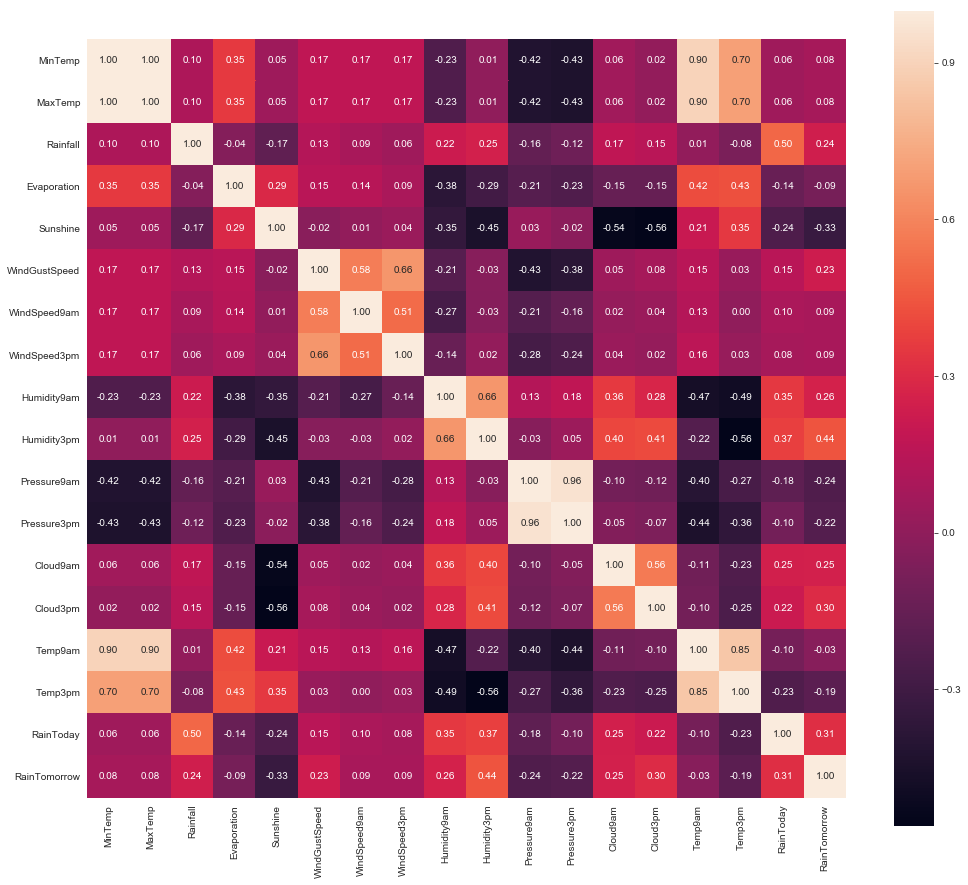

In [31]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(dataset.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

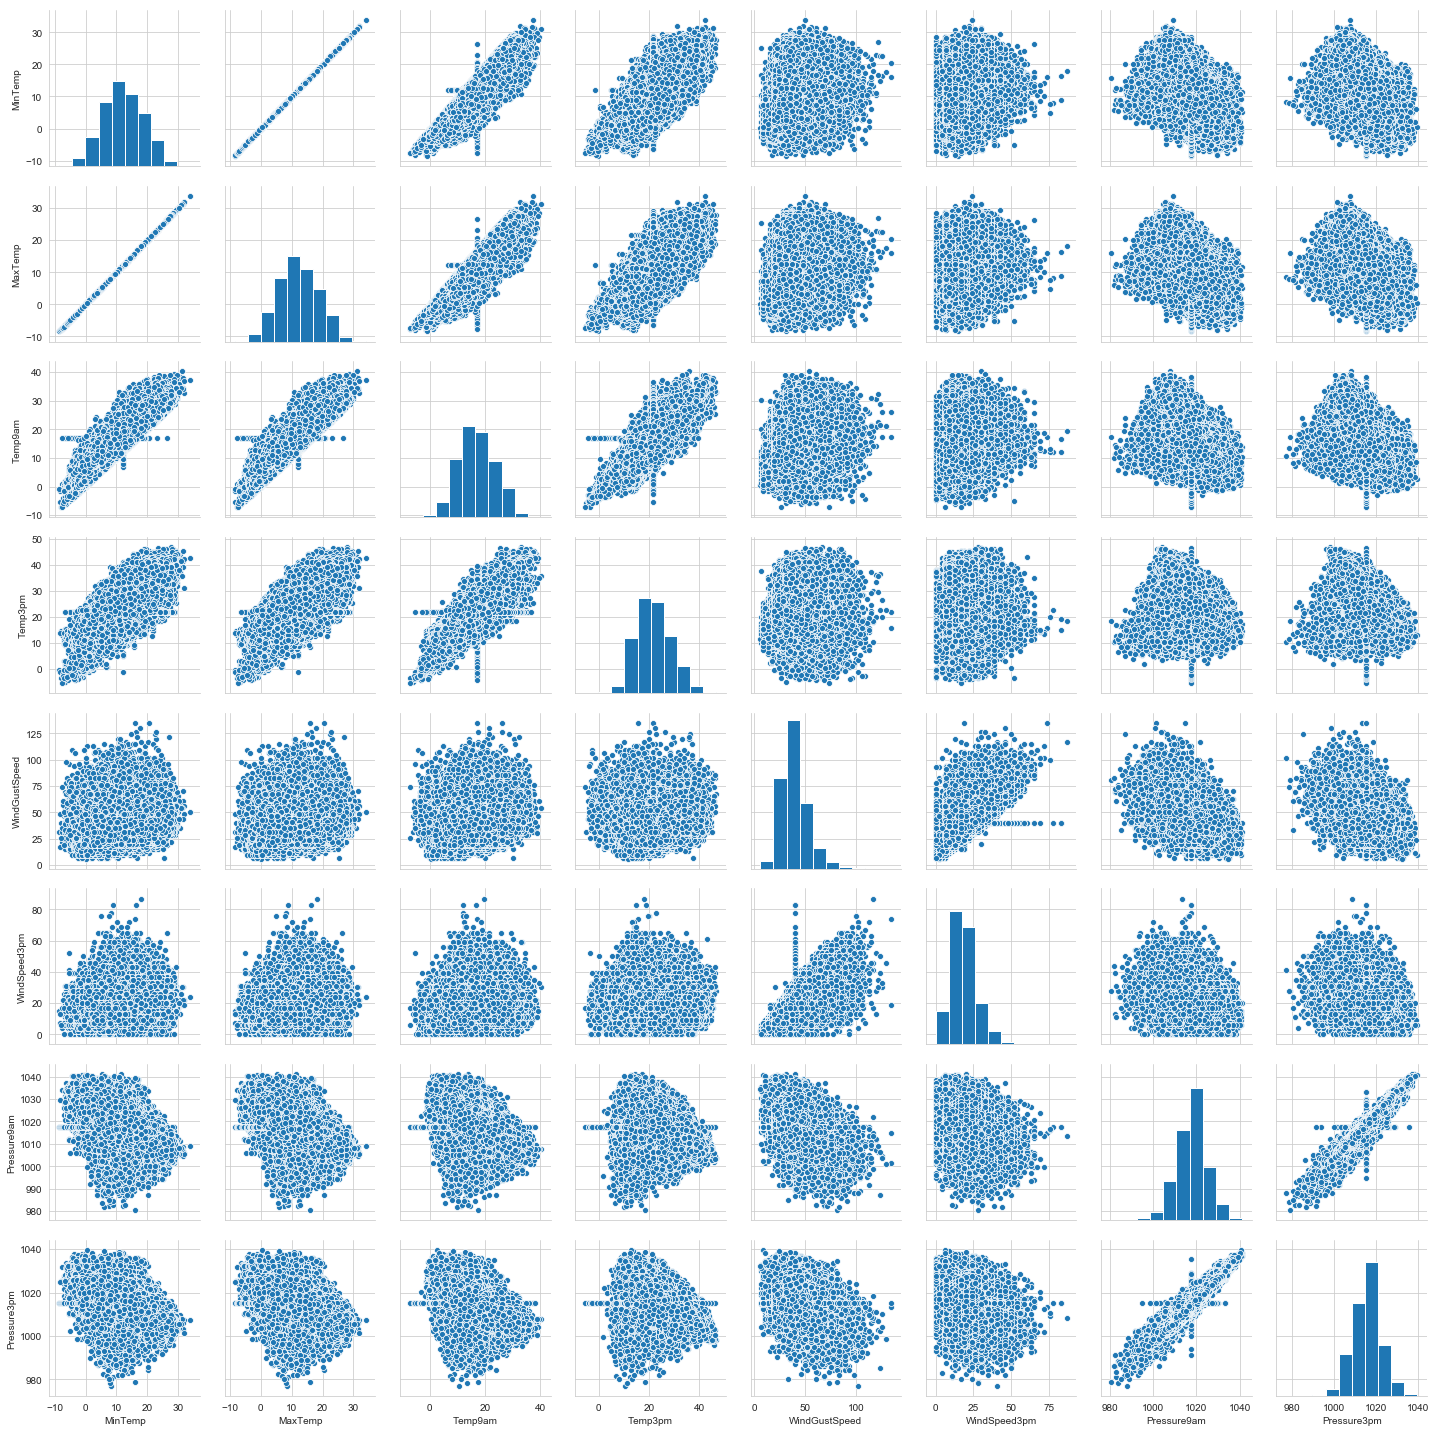

In [32]:
sns.pairplot(dataset[['MinTemp', 'MaxTemp', 'Temp9am', 
                      'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 
                      'Pressure9am', 'Pressure3pm']], kind='scatter', diag_kind='hist', palette='Rainbow')
plt.show()

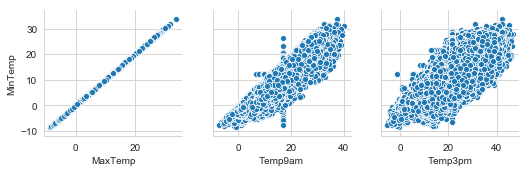

In [33]:
sns.pairplot(dataset, y_vars=['MinTemp'], x_vars=['MaxTemp', 'Temp9am', 'Temp3pm'])

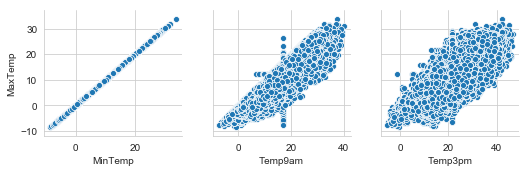

In [34]:
sns.pairplot(dataset, y_vars=['MaxTemp'], x_vars=['MinTemp','Temp9am', 'Temp3pm'])

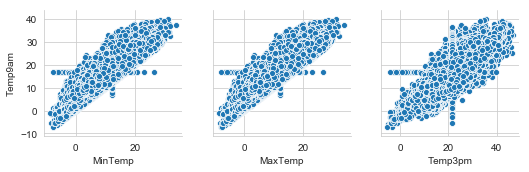

In [35]:
sns.pairplot(dataset, y_vars=['Temp9am'], x_vars=['MinTemp','MaxTemp', 'Temp3pm'])

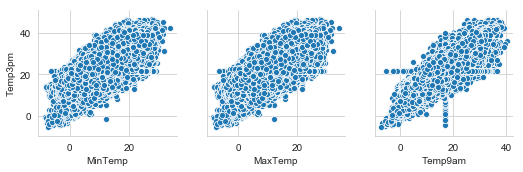

In [36]:
sns.pairplot(dataset, y_vars=['Temp3pm'], x_vars=['MinTemp','MaxTemp', 'Temp9am'])

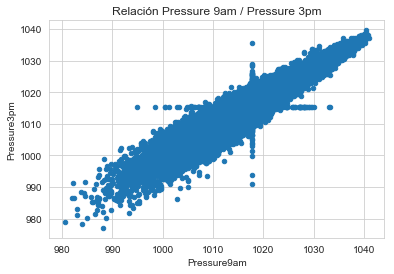

In [37]:
dataset.plot(kind='scatter', x='Pressure9am', y='Pressure3pm', title='Relación Pressure 9am / Pressure 3pm')

### Comprobación de Distribución Gaussiana

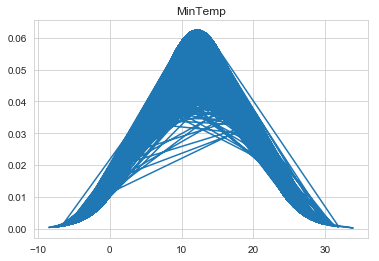

In [38]:
plt.figure()
variable = 'MinTemp'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

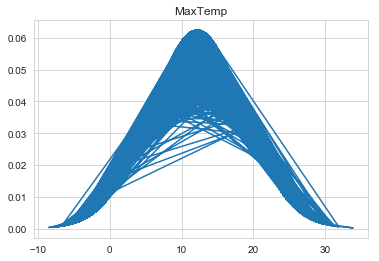

In [39]:
plt.figure()
variable = 'MaxTemp'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

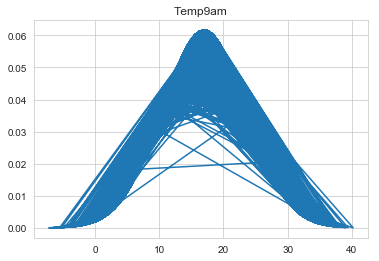

In [40]:
plt.figure()
variable = 'Temp9am'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

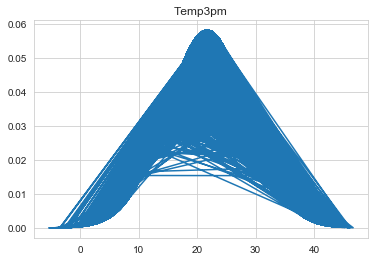

In [41]:
plt.figure()
variable = 'Temp3pm'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

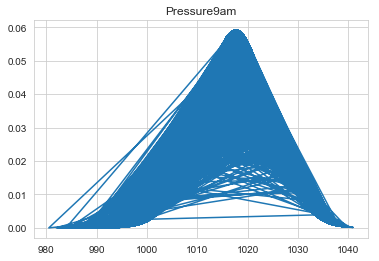

In [42]:
plt.figure()
variable = 'Pressure9am'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

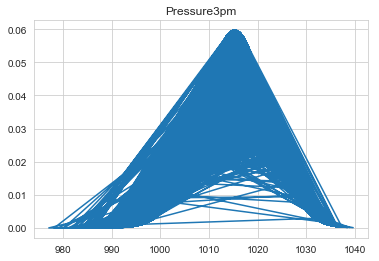

In [43]:
plt.figure()
variable = 'Pressure3pm'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

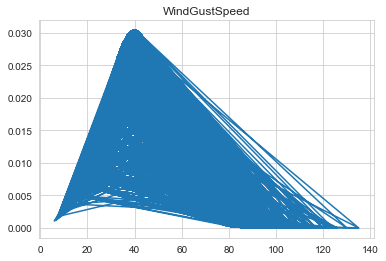

In [44]:
plt.figure()
variable = 'WindGustSpeed'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

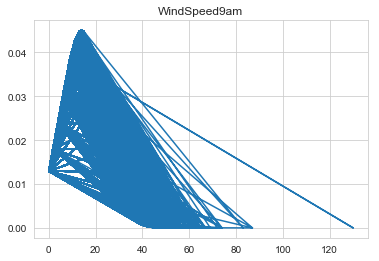

In [45]:
plt.figure()
variable = 'WindSpeed9am'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

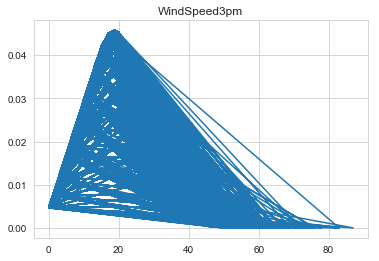

In [46]:
plt.figure()
variable = 'WindSpeed3pm'
media = dataset[variable].mean() 
sd = dataset[variable].std() 
  
plt.plot(dataset[variable], scp.norm.pdf(dataset[variable], media, sd)) 
plt.title(variable)
plt.show() 

In [47]:
labelencoder = preprocessing.LabelEncoder()
dataset['Location'] = labelencoder.fit_transform(dataset['Location'])
dataset['WindDir9am'] = labelencoder.fit_transform(dataset['WindDir9am'])
dataset['WindDir3pm'] = labelencoder.fit_transform(dataset['WindDir3pm'])
dataset['WindGustDir'] = labelencoder.fit_transform(dataset['WindGustDir'])

dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,13.4,0.6,5.472516,7.63054,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8,0,0
1,2008-12-02,2,7.4,7.4,0.0,5.472516,7.63054,14,44.0,6,...,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3,0,0
2,2008-12-03,2,12.9,12.9,0.0,5.472516,7.63054,15,46.0,13,...,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2,0,0
3,2008-12-04,2,9.2,9.2,0.0,5.472516,7.63054,4,24.0,9,...,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5,0,0
4,2008-12-05,2,17.5,17.5,1.0,5.472516,7.63054,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0


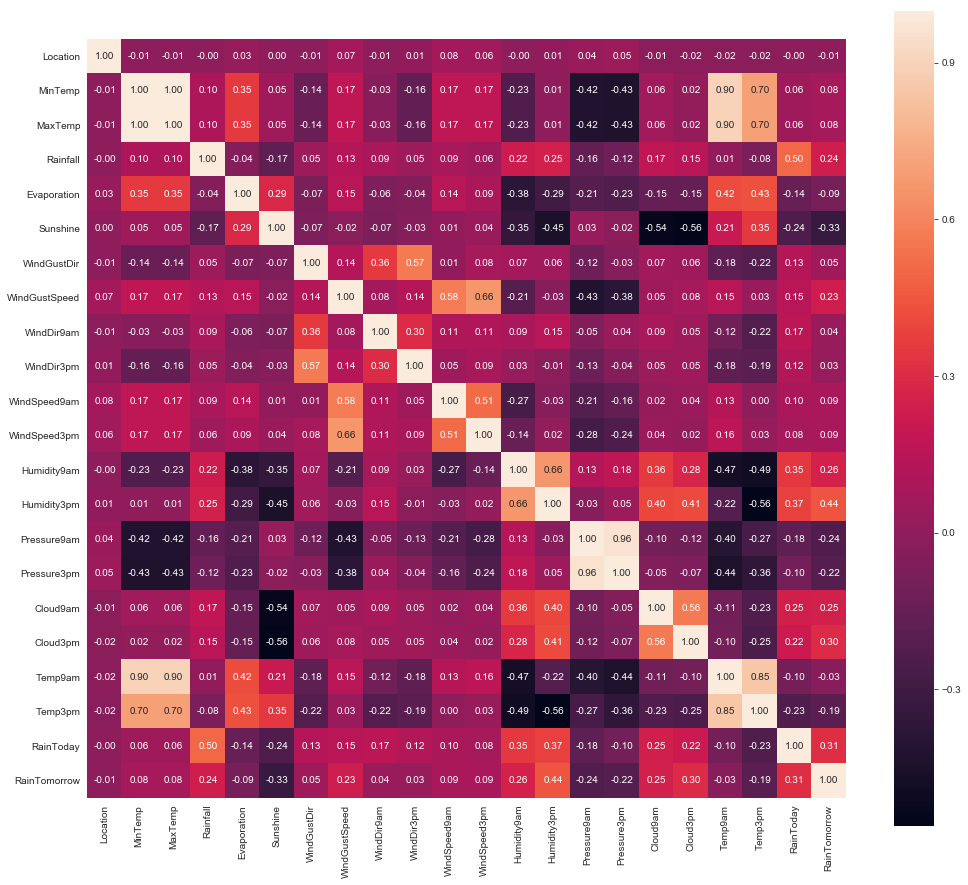

In [48]:
plt.figure(figsize=(17,15))
ax = sns.heatmap(dataset.corr(), square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()